# Trabajo de Machine Learning - Clasificación

### Presentado por:

# Santiago Agudelo Vahos
# Juan Gabriel Colorado Restrepo

## 1. Planteamiento del problema

¿Es un problema de regresión o clasificación?
¿Cuál es el tipo de regresión o de clasificación que se implementará?

En esta situación tenemos una base de datos de mujeres con tumores, etiquetados como benignos y malignos, por lo tanto, lo que se requiere es hacer una clasificación correcta sobre el tipo de tumor que padecen las pacientes, y dado que solo existen dos etiquetas para catalogarlas, entonces se trata de un tipo de clasificación binaria. 

In [1]:
# Install de Kaggle
!pip install -q kaggle

In [ ]:
# To upload kaggle.json file from local system (API file.json created in the Kaggle web)
from google.colab import files
files.upload()

In [3]:
# Create a kaggle folder
!mkdir ~/.kaggle

La sintaxis del comando no es correcta.


In [ ]:
# Copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# To list all datasets in kaggle
# ! kaggle datasets list

In [ ]:
# Copy API command
! kaggle datasets download -d yasserh/breast-cancer-dataset

In [ ]:
! unzip breast-cancer-dataset.zip

In [4]:
import pandas as pd

In [5]:
breast_cancer = pd.read_csv('data.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Descripción de la base de datos.

El cáncer de mama es el más común de las formas del cáncer que afecta a las mujeres. Representa alrededor del 25% de todos los casos de cáncer y afectó alrededor de 2.1 millones de personas solo en 2015. Inicia cuando las células en el seno comienzan a crecer descontroladamente. Estas células normalmente forman tumores que se pueden ver a través de rayos X o sentir como bultos en el área del seno.

El principal desafío contra su detección consiste en clasificar correctamente los tumores malignos (cancerosos) o benignos (no cancerosos). El conjunto de datos es de mujeres diagnosticadas con tumores en el estado de Wisconsin. 

## 2. Análisis exploratorio de los datos.

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [7]:
breast_cancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Selección de las variables

La variable de respuesta $y$ es el diagnóstico de si es un tumor benigno (B) o un tumor maligno (M), el nombre de la variable en la base de datos es: diagnosis.

Las variables independientes son:
- Radio promedio de los lóbulos (radius mean)
- Promedio de la textura de la superficie (texture_mean)
- Concavidad promedio (concavity_mean)
- Simetría promedio (symmetry_mean)
- Promedio de la dimensión fractal (fractal_dimension_mean)
- Indice de textura de tejido cancerígeno (texture_worst)
- Indice de área de tejido cancerígeno (area_worst)
- Indice de suavidad de tejido cancerígeno (smoothness_worst)
- Indice de concavidad de tejido cancerígeno (concavity_worst)
- Indice de simetría de tejido cancerígeno (symmetry_worst)
- indice de dimensión fractal de tejido cancerígeno (fractal_dimension_worst)

In [8]:
cancer_mama = breast_cancer[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                             'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst', 
                             'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 
                             'fractal_dimension_worst']]
cancer_mama

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.7119,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.08690,0.1812,0.05667,24.990,23.41,158.80,1956.0,0.12380,0.2416,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.19740,0.2069,0.05999,23.570,25.53,152.50,1709.0,0.14440,0.4504,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.24140,0.2597,0.09744,14.910,26.50,98.87,567.7,0.20980,0.6869,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.1809,0.05883,22.540,16.67,152.20,1575.0,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.24390,0.1726,0.05623,25.450,26.40,166.10,2027.0,0.14100,0.4107,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.14400,0.1752,0.05533,23.690,38.25,155.00,1731.0,0.11660,0.3215,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.09251,0.1590,0.05648,18.980,34.12,126.70,1124.0,0.11390,0.3403,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.35140,0.2397,0.07016,25.740,39.42,184.60,1821.0,0.16500,0.9387,0.4087,0.12400


In [9]:
# Reetiquetado de los atributos
cancer_mama.rename(columns = {'diagnosis':'diagnostico',
                             'radius_mean':'media_radio_lobulos',
                             'texture_mean':'media_textura_superficie',
                             'perimeter_mean':'perimetro_exterior_lobulos',
                             'area_mean':'area_media_lobulos',
                             'smoothness_mean':'media_niveles_suavidad',
                             'concavity_mean':'media_concavidad',
                             'symmetry_mean':'media_simetria',
                             'fractal_dimension_mean':'media_simetria_fractal',
                             'radius_worst':'radio_malo',
                             'texture_worst':'textura_mala',
                             'perimeter_worst':'perimetro_malo',
                             'area_worst':'area_mala',
                             'smoothness_worst':'suavidad_mala',
                             'concavity_worst':'concavidad_mala',
                             'symmetry_worst':'simetria_mala',
                             'fractal_dimension_worst':'dimension_fractal_mala'}, inplace = True)

C:\Users\Marco\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
cancer_mama

,diagnostico,media_radio_lobulos,media_textura_superficie,perimetro_exterior_lobulos,area_media_lobulos,media_niveles_suavidad,media_concavidad,media_simetria,media_simetria_fractal,radio_malo,textura_mala,perimetro_malo,area_mala,suavidad_mala,concavidad_mala,simetria_mala,dimension_fractal_mala
0,M,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.7119,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.08690,0.1812,0.05667,24.990,23.41,158.80,1956.0,0.12380,0.2416,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.19740,0.2069,0.05999,23.570,25.53,152.50,1709.0,0.14440,0.4504,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.24140,0.2597,0.09744,14.910,26.50,98.87,567.7,0.20980,0.6869,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.1809,0.05883,22.540,16.67,152.20,1575.0,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.24390,0.1726,0.05623,25.450,26.40,166.10,2027.0,0.14100,0.4107,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.14400,0.1752,0.05533,23.690,38.25,155.00,1731.0,0.11660,0.3215,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.09251,0.1590,0.05648,18.980,34.12,126.70,1124.0,0.11390,0.3403,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.35140,0.2397,0.07016,25.740,39.42,184.60,1821.0,0.16500,0.9387,0.4087,0.12400


In [11]:
cancer_mama[['diagnostico']].value_counts()

diagnostico
B              357
M              212
dtype: int64

In [12]:
cancer_mama.isnull().sum() # Cantidad de elementos faltantes para cada atributo

diagnostico                   0
media_radio_lobulos           0
media_textura_superficie      0
perimetro_exterior_lobulos    0
area_media_lobulos            0
media_niveles_suavidad        0
media_concavidad              0
media_simetria                0
media_simetria_fractal        0
radio_malo                    0
textura_mala                  0
perimetro_malo                0
area_mala                     0
suavidad_mala                 0
concavidad_mala               0
simetria_mala                 0
dimension_fractal_mala        0
dtype: int64

In [13]:
cancer_mama_numerico = cancer_mama.drop('diagnostico', axis = 1)
cancer_mama_numerico

,media_radio_lobulos,media_textura_superficie,perimetro_exterior_lobulos,area_media_lobulos,media_niveles_suavidad,media_concavidad,media_simetria,media_simetria_fractal,radio_malo,textura_mala,perimetro_malo,area_mala,suavidad_mala,concavidad_mala,simetria_mala,dimension_fractal_mala
0,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.7119,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.08690,0.1812,0.05667,24.990,23.41,158.80,1956.0,0.12380,0.2416,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.19740,0.2069,0.05999,23.570,25.53,152.50,1709.0,0.14440,0.4504,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.24140,0.2597,0.09744,14.910,26.50,98.87,567.7,0.20980,0.6869,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.1809,0.05883,22.540,16.67,152.20,1575.0,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.24390,0.1726,0.05623,25.450,26.40,166.10,2027.0,0.14100,0.4107,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.14400,0.1752,0.05533,23.690,38.25,155.00,1731.0,0.11660,0.3215,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.09251,0.1590,0.05648,18.980,34.12,126.70,1124.0,0.11390,0.3403,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.35140,0.2397,0.07016,25.740,39.42,184.60,1821.0,0.16500,0.9387,0.4087,0.12400


In [14]:
cancer_mama_numerico.corr()

,media_radio_lobulos,media_textura_superficie,perimetro_exterior_lobulos,area_media_lobulos,media_niveles_suavidad,media_concavidad,media_simetria,media_simetria_fractal,radio_malo,textura_mala,perimetro_malo,area_mala,suavidad_mala,concavidad_mala,simetria_mala,dimension_fractal_mala
media_radio_lobulos,1.000000,0.323782,0.997855,0.987357,0.170581,0.676764,0.147741,-0.311631,0.969539,0.297008,0.965137,0.941082,0.119616,0.526911,0.163953,0.007066
media_textura_superficie,0.323782,1.000000,0.329533,0.321086,-0.023389,0.302418,0.071401,-0.076437,0.352573,0.912045,0.358040,0.343546,0.077503,0.301025,0.105008,0.119205
perimetro_exterior_lobulos,0.997855,0.329533,1.000000,0.986507,0.207278,0.716136,0.183027,-0.261477,0.969476,0.303038,0.970387,0.941550,0.150549,0.563879,0.189115,0.051019
area_media_lobulos,0.987357,0.321086,0.986507,1.000000,0.177028,0.685983,0.151293,-0.283110,0.962746,0.287489,0.959120,0.959213,0.123523,0.512606,0.143570,0.003738
media_niveles_suavidad,0.170581,-0.023389,0.207278,0.177028,1.000000,0.521984,0.557775,0.584792,0.213120,0.036072,0.238853,0.206718,0.805324,0.434926,0.394309,0.499316
media_concavidad,0.676764,0.302418,0.716136,0.685983,0.521984,1.000000,0.500667,0.336783,0.688236,0.299879,0.729565,0.675987,0.448822,0.884103,0.409464,0.514930
media_simetria,0.147741,0.071401,0.183027,0.151293,0.557775,0.500667,1.000000,0.479921,0.185728,0.090651,0.219169,0.177193,0.426675,0.433721,0.699826,0.438413
media_simetria_fractal,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.336783,0.479921,1.000000,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.346234,0.334019,0.767297
radio_malo,0.969539,0.352573,0.969476,0.962746,0.213120,0.688236,0.185728,-0.253691,1.000000,0.359921,0.993708,0.984015,0.216574,0.573975,0.243529,0.093492
textura_mala,0.297008,0.912045,0.303038,0.287489,0.036072,0.299879,0.090651,-0.051269,0.359921,1.000000,0.365098,0.345842,0.225429,0.368366,0.233027,0.219122


In [15]:
import seaborn as sns
from matplotlib import pyplot

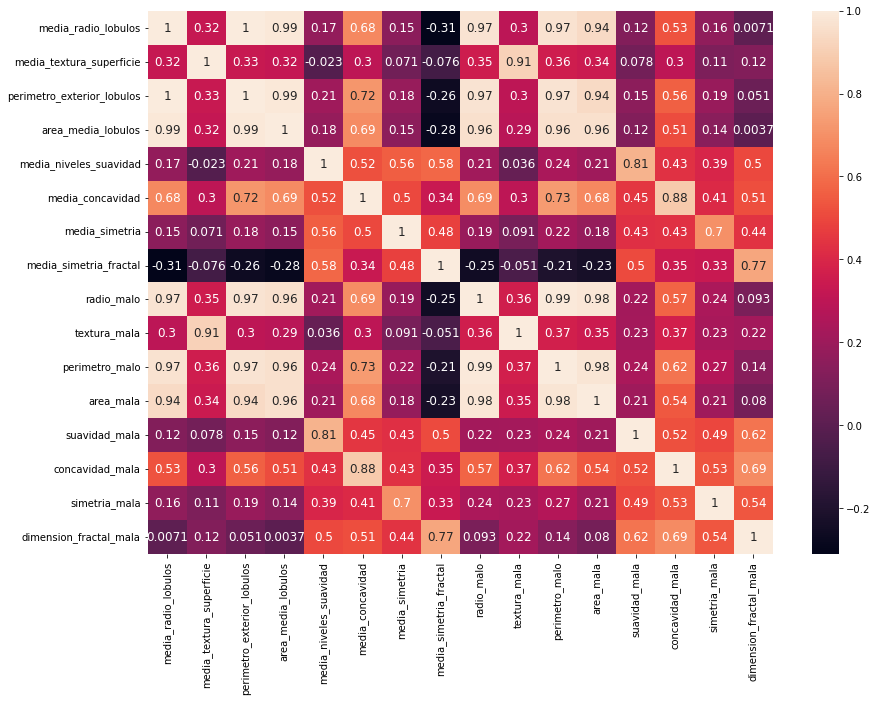

In [16]:
dimensiones = (14, 10)
fig, ax = pyplot.subplots(figsize = dimensiones)
sns.heatmap(cancer_mama_numerico.corr(), ax = ax, annot=True, annot_kws={"size": 12});

### Se usarán los resultados del análisis de correlación lineal para descartar variables que posiblemente podrían presentar multicolinealidad. Esto se hará bajo el criterio de los analistas, no se hará ninguna prueba de inferencia estadística para demostrar estos supuestos. El área media de los lóbulos tiene una correlación de 0.99 con el radio medio de los lóbulos y una correlación de 1 con el perímetro exterior de los lóbulos; igualmente el radio medio de los lóbulos tiene una correlación de 0.97 con otras dos variables: el radio del tejido malo y el perímetro del tejido malo. En este caso se elminan tres variables: el perímetro exterior de los lóbulo, el área media de los lóbulos y el radio del tejido malo.

### Es importante apuntar otra correlación muy elevada entre las variables perímetro del tejido malo y el área del tejido malo, de 0.98, lo que nos indica la exclusión de alguna de esas variables. En este caso se excluye el perímetro del tejido malo, ya que también tiene una elevada correlación, de 0.97 con la variable radio medio de los lóbulos.

Se valora que no solo se explora la correlación con la variable objetivo, sino las correlaciones entre las variables predictoras para tratar de evitar la multicolinealidad. 

In [17]:
cancer_mama = cancer_mama[['diagnostico', 'media_radio_lobulos', 'media_textura_superficie', \
                           'media_niveles_suavidad',
                           'media_concavidad', 'media_simetria', 'media_simetria_fractal', \
                           'textura_mala', 'area_mala', 
                           'suavidad_mala', 'concavidad_mala', 'simetria_mala', \
                           'dimension_fractal_mala']]
cancer_mama

,diagnostico,media_radio_lobulos,media_textura_superficie,media_niveles_suavidad,media_concavidad,media_simetria,media_simetria_fractal,textura_mala,area_mala,suavidad_mala,concavidad_mala,simetria_mala,dimension_fractal_mala
0,M,17.99,10.38,0.11840,0.30010,0.2419,0.07871,17.33,2019.0,0.16220,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.08690,0.1812,0.05667,23.41,1956.0,0.12380,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.19740,0.2069,0.05999,25.53,1709.0,0.14440,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.24140,0.2597,0.09744,26.50,567.7,0.20980,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.19800,0.1809,0.05883,16.67,1575.0,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.24390,0.1726,0.05623,26.40,2027.0,0.14100,0.4107,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.14400,0.1752,0.05533,38.25,1731.0,0.11660,0.3215,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.09251,0.1590,0.05648,34.12,1124.0,0.11390,0.3403,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.35140,0.2397,0.07016,39.42,1821.0,0.16500,0.9387,0.4087,0.12400


## Visualización de datos a través de histogramas y diagramas de dispersión

In [18]:
from pandas.plotting import scatter_matrix

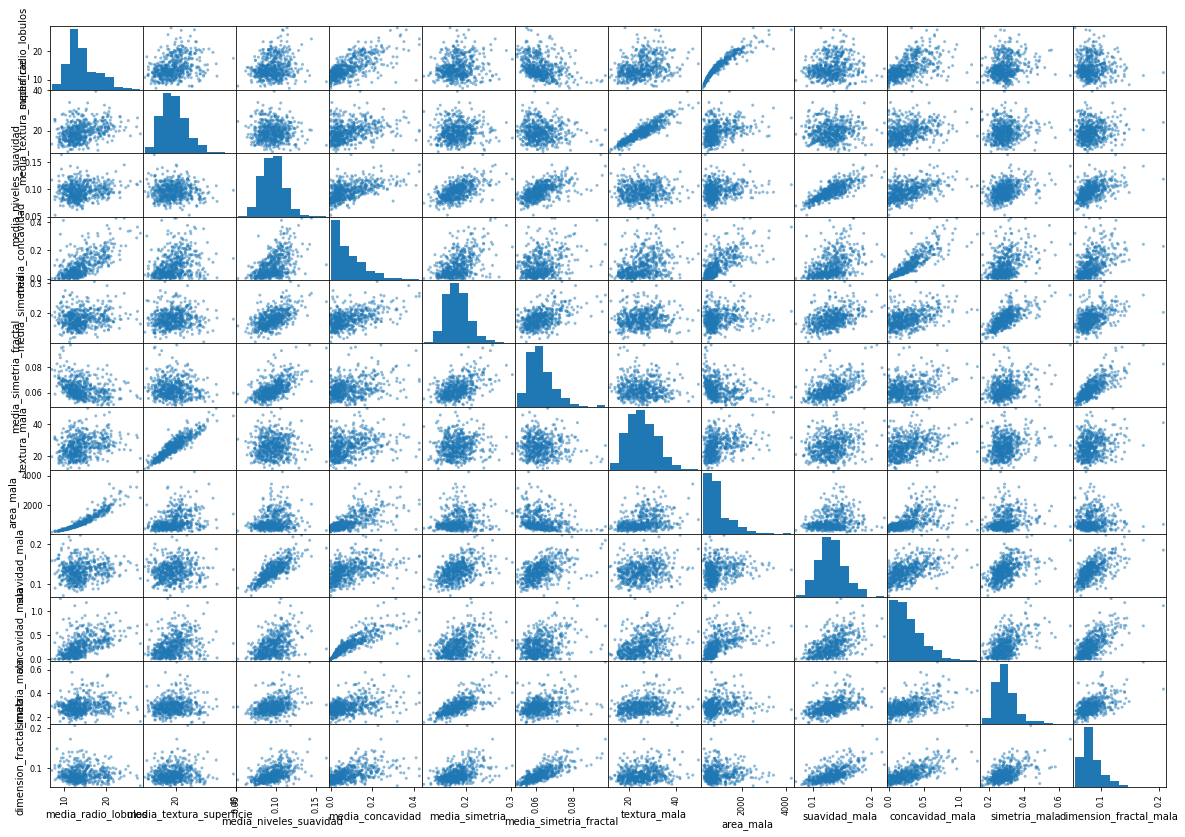

In [19]:
atributos = ['diagnostico', 'media_radio_lobulos', 'media_textura_superficie', 'media_niveles_suavidad', 
             'media_concavidad', 'media_simetria', 'media_simetria_fractal', 'textura_mala', 'area_mala', 
             'suavidad_mala', 'concavidad_mala', 'simetria_mala', 'dimension_fractal_mala']
scatter_matrix(cancer_mama[atributos], figsize = (20, 14));

*Se recomienda buscar alternativas para desplegar los títulos o etiquetas de los ejes, de tal manera que no se superpongan, dado el tamaño de la imagen; o crear dos scatter matrix.*

Todas las variables son numéricas. Entre ellas encontramos algunos patrones que se asemejan al de correlación lineal, en la mayoría de los casos positiva. Dentro de los gráficos que grafican una distribución aproximada de los datos para cada variable, se observan patrones similares a los de la distribución normal, en otros casos se evidencia distribuciones asimétricas de cola derecha.

# 3. Preparación de los datos para los algoritmos de aprendizaje 

In [20]:
diagnostico = cancer_mama['diagnostico'] # variable de respuesta
diagnostico 

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnostico, Length: 569, dtype: object

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
cancer_mama_numerico = cancer_mama.drop('diagnostico', axis = 1) # Quitamos la variable respuesta diagnóstico de la base de datos final

## Separación inicial de los datos de entrenamiento y testeo

In [23]:
from sklearn.model_selection import train_test_split 

cancer_train, cancer_test, diagnostico_train, diagnotico_test = train_test_split(cancer_mama_numerico, diagnostico, test_size = 0.2, random_state = 50)

# conjunto_entrenamiento 80% (455 datos)
# conjunto_testeo 20% (114 datos)

In [24]:
len(cancer_train), len(cancer_test)

(455, 114)

In [25]:
len(cancer_train) / (len(cancer_test) + len(cancer_train))

0.7996485061511424

## Estandarización de los datos

In [26]:
from sklearn.preprocessing import StandardScaler

estandarizador = StandardScaler()
cancer_train_estandarizado = estandarizador.fit_transform(cancer_train)
cancer_train = cancer_train_estandarizado

# 4. Entrenamiento y selección del modelo 

Importanción de librerías necesarias para la construcción de los modelos

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Instanciamos las clases

In [28]:
SGD_class = SGDClassifier()
Random_forest_class = RandomForestClassifier()
K_N_N_class = KNeighborsClassifier()
Log_reg_class = LogisticRegression()
Decision_tree_class = DecisionTreeClassifier()

Entrenamiento de los modelos con los datos del cáncer de mama

In [29]:
SGD_class.fit(cancer_train, diagnostico_train)
Random_forest_class.fit(cancer_train, diagnostico_train)
K_N_N_class.fit(cancer_train, diagnostico_train)
Log_reg_class.fit(cancer_train, diagnostico_train)
Decision_tree_class.fit(cancer_train, diagnostico_train)

DecisionTreeClassifier()

Evaluación del desempeño de los modelos con la Matriz de Confusión

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, precision_score

In [31]:
diagnostico_train_predict_SGD = cross_val_predict(SGD_class, cancer_train, diagnostico_train, cv = 4)
diagnostico_train_predict_Random_Forest = cross_val_predict(Random_forest_class, cancer_train, \
                                                            diagnostico_train, cv = 4)
diagnostico_train_predict_K_N_N = cross_val_predict(K_N_N_class, cancer_train, diagnostico_train,\
                                                    cv = 4)
diagnostico_train_predict_Log_reg = cross_val_predict(Log_reg_class, cancer_train, diagnostico_train,\
                                                      cv = 4)
diagnostico_train_predict_Decision_tree = cross_val_predict(Decision_tree_class, cancer_train,\
                                                            diagnostico_train, cv = 4)

Los elementos de la matriz de confusión los podemos definir de la siguiente manera: la entrada $a_{11}$ serían los registros de tumores benignos y fueron predichos como tumores benignos; la entrada $a_{12}$ serían los registros de tumores benignos y fueron predichos como tumores malignos; la entrada $a_{21}$ serían los registros que son de tumores malignos y fueron predichos como tumores benignos; finalmente, la entrada $a_{22}$ son los registros de tumores malignos que fueron predichos como malignos.

In [32]:
matriz_confusion = confusion_matrix(diagnostico_train, diagnostico_train_predict_SGD) 
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0]
print(matriz_confusion)

[[265  17]
 [ 10 163]]


In [33]:
# recall_score manual
recall_score_SGD = TP / (FP + TP)
print(recall_score_SGD)

# precision_score manual
precision_score_SGD = TP / (FN + TP)
print(precision_score_SGD)

0.9055555555555556
0.9421965317919075


Si importó las funciones `recall_score` y `precision_score`, se recomienda que las use para evitar la repitencia de código. 

In [34]:
matriz_confusion = confusion_matrix(diagnostico_train, diagnostico_train_predict_Random_Forest)
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0] 
print(matriz_confusion)

[[276   6]
 [  8 165]]


In [35]:
# recall_score manual
recall_score_Random_Forest = TP / (FP + TP)
print(recall_score_Random_Forest)

# precision_score manual
precision_score_Random_Forest = TP / (FN + TP)
print(precision_score_Random_Forest)

0.9649122807017544
0.953757225433526


In [36]:
matriz_confusion = confusion_matrix(diagnostico_train, diagnostico_train_predict_K_N_N)
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0] 
print(matriz_confusion)

[[277   5]
 [ 15 158]]


In [37]:
# recall_score manual
recall_score_K_N_N = TP / (FP + TP)
print(recall_score_K_N_N)

# precision_score manual
precision_score_K_N_N = TP / (FN + TP)
print(precision_score_K_N_N)

0.9693251533742331
0.9132947976878613


In [38]:
matriz_confusion = confusion_matrix(diagnostico_train, diagnostico_train_predict_Log_reg)
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0] 
print(matriz_confusion)

[[276   6]
 [ 10 163]]


In [39]:
# recall_score manual
recall_score_log_reg = TP / (FP + TP)
print(recall_score_log_reg)

# precision_score manual
precision_score_log_reg = TP / (FN + TP)
print(precision_score_log_reg)

0.9644970414201184
0.9421965317919075


In [40]:
matriz_confusion = confusion_matrix(diagnostico_train, diagnostico_train_predict_Decision_tree)
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0] 
print(matriz_confusion)

[[271  11]
 [ 16 157]]


In [41]:
# recall_score manual
recall_score_decision_tree = TP / (FP + TP)
print(recall_score_decision_tree)

# precision_score manual
precision_score_decision_tree = TP / (FN + TP)
print(precision_score_decision_tree)

0.9345238095238095
0.9075144508670521


In [42]:
recall = np.array([recall_score_decision_tree, recall_score_log_reg, recall_score_K_N_N, recall_score_Random_Forest, recall_score_SGD])

In [ ]:
np.max(recall)

### Al usar la métrica recall se obtiene que el mejor modelo es el k-Nearest Neighbor (KNN) otorgando un puntaje de 0.9693 aproximadamente, indicando que 5 de los registros fueron catalogados como tumores malignos cuando los datos reales indicaban que tales registros eran de tumores benignos (FP); mientras que por otra parte señalaba 15 registros como tumores malignos cuando realmente eran benignos.

*Recuerde que la selección del mejor modelo se realiza con el uso de la metodología de validación cruzada. Recuerde los riesgos de seleccionar en el conjunto de entrenamiento sin validación cruzada cuando se considera un modelo que en general presenta sobreajuste como el `DecisionTree`.*

In [43]:
precision = np.array([precision_score_decision_tree, precision_score_log_reg, precision_score_K_N_N, 
                   precision_score_Random_Forest, precision_score_SGD])

In [44]:
np.max(precision)

0.953757225433526

### Al usar la métrica de "precision", el mejor modelo es el Random Forest, con un puntaje aproximado de 0.9480 aproximadamente, esta nos indicaba que 6 de los registros estaban mal clasificados, indicando que eran tumores malignos cuando realmente eran tumores benignos. Mientras que 10 de los registros afirmaba que eran tumores benignos, cuando realmente los datos indicaban que se trataba de tumores malignos.

### Finalmente se procede a elegir el modelo que presenta mayor puntaje en el métrica de "precision": el Random Forest.

# 5. Prueba de desempeño del modelo seleccionado con el conjunto de datos de testeo

In [45]:
cancer_test_estandarizado = estandarizador.transform(cancer_test)

In [46]:
diagnostico_test_predict = Random_forest_class.predict(cancer_test_estandarizado)

In [47]:
matriz_confusion = confusion_matrix(diagnotico_test, diagnostico_test_predict) # Matriz de confusión para el conjunto de datos de testeo
TP = matriz_confusion[1, 1]
FP = matriz_confusion[0, 1]
FN = matriz_confusion[1, 0] 
print(matriz_confusion)

[[73  2]
 [ 1 38]]


In [48]:
# recall_score manual
recall_score_Random_Forest_testeo = TP / (FP + TP)
print(recall_score_Random_Forest_testeo)

# precision_score manual
precision_score_Random_Forest_testeo = TP / (FN + TP)
print(precision_score_Random_Forest_testeo)

0.95
0.9743589743589743


### Finalmente, se observa un 'recall' con un puntaje de 0.95 y un 'precision' con un puntaje de 0.9743 aproximadamente, lo que nos indica un modelo bastante aceptable para predecir, considerando que solo hubo dos registros que consideraron que el tumor era maligno cuando realmente eran tumores benignos (FP), mientras que solo hubo un registro donde el tumor era realmente maligno y fue predicho como benigno. Por lo tanto, el modelo, considerando las variables aplicadas en el trabajo, puede ser un buen clasificador para catalogar si un tumor puede convertirse en cáncer o si solo se trata de un tejido inofensivo.

No realizó validación cruzada para la seelcción de los modelos ni la cuadrícula de hiperparámetros para la afinación del modelo seleccionado. 

Nota: 3.0